<a href="https://colab.research.google.com/github/Harshith2005pendela/Harshith2005pendela/blob/main/ee6106.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

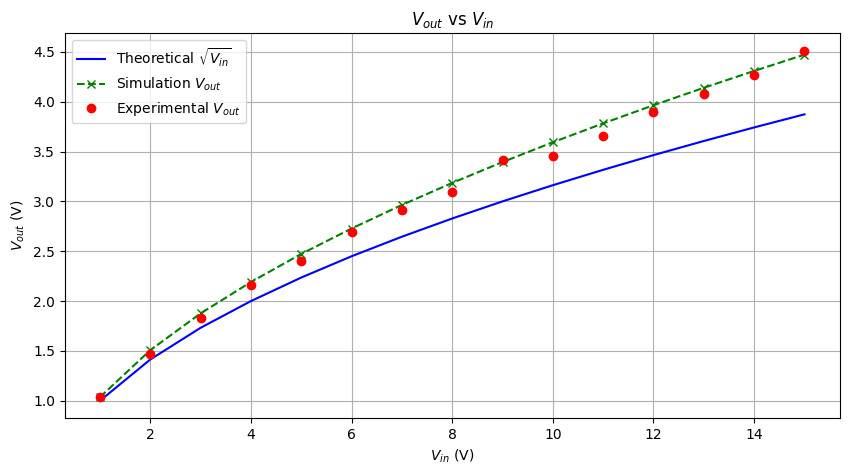

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
Vin = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Vout_sim = [1.036667, 1.507489, 1.876260, 2.191077, 2.472769, 2.727773, 2.963974, 3.185308, 3.394279, 3.592817, 3.782410, 3.964220, 4.139176, 4.308033, 4.471418]
Vout_exp = [1.04, 1.47, 1.83, 2.16, 2.40, 2.69, 2.91, 3.09, 3.42, 3.46, 3.66, 3.90, 4.08, 4.27, 4.51]
sqrt_Vin = [np.sqrt(v) for v in Vin]  # Theoretical sqrt(Vin)

# Plot 1: Vout vs Vin
plt.figure(figsize=(10, 5))
plt.plot(Vin, sqrt_Vin, label='Theoretical $\sqrt{V_{in}}$', linestyle='-', color='blue')
plt.plot(Vin, Vout_sim, label='Simulation $V_{out}$', marker='x', linestyle='--', color='green')
plt.plot(Vin, Vout_exp, label='Experimental $V_{out}$', marker='o', linestyle='none', color='red')
plt.xlabel('$V_{in}$ (V)')
plt.ylabel('$V_{out}$ (V)')
plt.title('$V_{out}$ vs $V_{in}$')
plt.grid(True)
plt.legend()
plt.show()

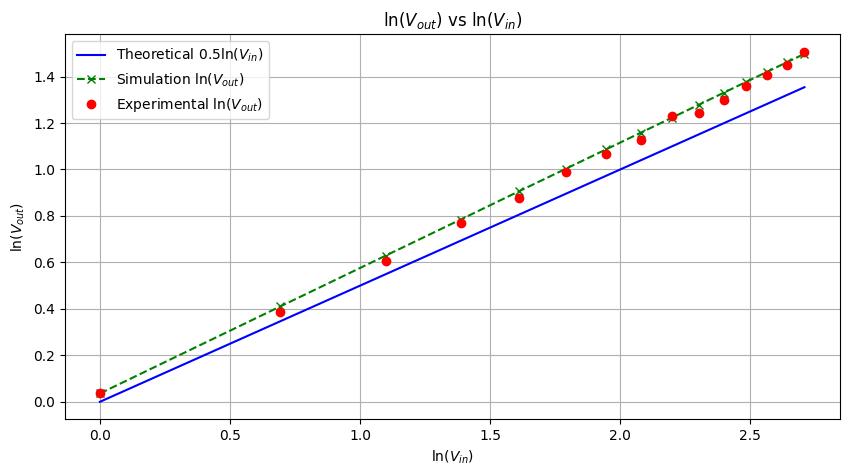

In [2]:
# Plot 2: ln(Vout) vs ln(Vin)
ln_Vin = [np.log(v) for v in Vin]
ln_Vout_sim = [np.log(v) for v in Vout_sim]
ln_Vout_exp = [np.log(v) for v in Vout_exp]
ln_sqrt_Vin = [0.5 * np.log(v) for v in Vin]  # Theoretical ln(sqrt(Vin)) = 0.5 * ln(Vin)

plt.figure(figsize=(10, 5))
plt.plot(ln_Vin, ln_sqrt_Vin, label='Theoretical $0.5 \ln(V_{in})$', linestyle='-', color='blue')
plt.plot(ln_Vin, ln_Vout_sim, label='Simulation $\ln(V_{out})$', marker='x', linestyle='--', color='green')
plt.plot(ln_Vin, ln_Vout_exp, label='Experimental $\ln(V_{out})$', marker='o', linestyle='none', color='red')
plt.xlabel('$\ln(V_{in})$')
plt.ylabel('$\ln(V_{out})$')
plt.title('$\ln(V_{out})$ vs $\ln(V_{in})$')
plt.grid(True)
plt.legend()
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Bandit parameters for part (a)
means_a = [2, 1.8, 1.5, 1]
optimal_mean_a = 2
T = 2000  # Time horizon
num_runs = 500  # Number of runs for averaging

# ETC Algorithm
def run_etc(m, T, means):
    k = len(means)
    explore_steps = m * k
    if explore_steps > T:
        raise ValueError("m is too large for T")
    emp_means = np.zeros(k)
    n = np.zeros(k)
    regret = np.zeros(T)
    t = 0
    # Explore phase
    for _ in range(m):
        for arm in range(k):
            reward = np.random.normal(means[arm], 1)
            emp_means[arm] = (emp_means[arm] * n[arm] + reward) / (n[arm] + 1)
            n[arm] += 1
            regret[t] = optimal_mean_a - means[arm]
            t += 1
    # Commit phase
    best_arm = np.argmax(emp_means)
    while t < T:
        regret[t] = optimal_mean_a - means[best_arm]
        t += 1
    return np.cumsum(regret)

In [ ]:
import numpy as np

def run_ucb(T, means, alpha=2):
    k = len(means)
    optimal_mean = max(means)  # Compute the optimal arm's mean reward
    n = np.ones(k)  # Number of pulls per arm (starts at 1)
    sum_rewards = np.zeros(k)  # Cumulative reward per arm
    cumulative_regret = np.zeros(T)
    total_regret = 0

    # Initial phase: Pull each arm once
    for arm in range(k):
        reward = np.random.normal(means[arm], 1)
        sum_rewards[arm] = reward
        # Update cumulative regret
        inst_regret = optimal_mean - means[arm]
        total_regret += inst_regret
        cumulative_regret[arm] = total_regret

    # Main UCB loop for remaining pulls
    for t in range(k, T):
        # Calculate UCB for each arm
        ucb = sum_rewards / n + np.sqrt(alpha * np.log(t) / n)
        arm = np.argmax(ucb)
        # Pull the selected arm and observe reward
        reward = np.random.normal(means[arm], 1)
        # Update arm statistics
        sum_rewards[arm] += reward
        n[arm] += 1
        # Update regret
        inst_regret = optimal_mean - means[arm]
        total_regret += inst_regret
        cumulative_regret[t] = total_regret

    return cumulative_regret

In [ ]:
# Anytime UCB (using alpha=1)
def run_anytime_ucb(T, means):
    return run_ucb(T, means, alpha=1)

# Simulate part (a)
m_values = [10, 20, 50, 100, 200]
etc_regrets = {m: np.zeros(T) for m in m_values}
ucb_regrets = np.zeros(T)
anytime_ucb_regrets = np.zeros(T)

for run in range(num_runs):
    print(f"Run {run+1}/{num_runs}")
    # ETC
    for m in m_values:
        if 4*m > T:
            continue
        try:
            etc_regret = run_etc(m, T, means_a)
            etc_regrets[m] += etc_regret
        except:
            continue
    # UCB
    ucb_regret = run_ucb(T, means_a, alpha=2)
    ucb_regrets += ucb_regret
    # Anytime UCB
    anytime_regret = run_anytime_ucb(T, means_a)
    anytime_ucb_regrets += anytime_regret

# Average the results
for m in m_values:
    if 4*m <= T:
        etc_regrets[m] /= num_runs
ucb_regrets /= num_runs
anytime_ucb_regrets /= num_runs

# Plotting
plt.figure(figsize=(10, 6))
for m in m_values:
    if 4*m <= T:
        plt.plot(etc_regrets[m], label=f'ETC m={m}')
plt.plot(ucb_regrets, label='UCB (alpha=2)')
plt.plot(anytime_ucb_regrets, label='Anytime UCB (alpha=1)')
plt.xlabel('Time Step')
plt.ylabel('Average Cumulative Regret')
plt.title('Average Cumulative Regret of Different Algorithms')
plt.legend()
plt.grid(True)
plt.show()

mu2=1.55, Avg Regret=37.44
mu2=1.60, Avg Regret=34.77
mu2=1.65, Avg Regret=38.78
mu2=1.70, Avg Regret=38.14
mu2=1.75, Avg Regret=41.30
mu2=1.80, Avg Regret=45.60
mu2=1.85, Avg Regret=50.50
mu2=1.90, Avg Regret=51.74
mu2=1.95, Avg Regret=50.26


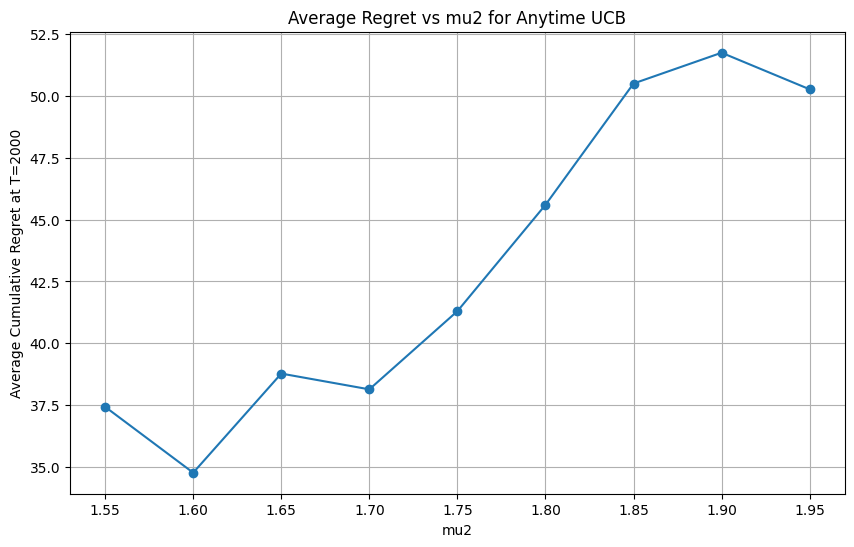

In [2]:
# Part (b) parameters
mu2_values = np.arange(1.55, 1.96, 0.05)  # From 1.55 to 1.95 inclusive
T_b = 2000
num_runs_b = 500
avg_regrets = []

for mu2 in mu2_values:
    current_means = [2, mu2, 1.5, 1]
    total_regret = 0.0
    for _ in range(num_runs_b):
        cum_regret = run_anytime_ucb(T_b, current_means)
        total_regret += cum_regret[-1]  # Final cumulative regret
    avg_regret = total_regret / num_runs_b
    avg_regrets.append(avg_regret)
    print(f"mu2={mu2:.2f}, Avg Regret={avg_regret:.2f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mu2_values, avg_regrets, marker='o')
plt.xlabel('mu2')
plt.ylabel('Average Cumulative Regret at T=2000')
plt.title('Average Regret vs mu2 for Anytime UCB')
plt.grid(True)
plt.show()